<a href="https://colab.research.google.com/github/akshat-suwalka/Machine-Learning-Algorithms-from-Scratch/blob/master/DBSCAN_From_Scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Library

In [1]:
import numpy as np
from itertools import cycle, islice
import matplotlib.pyplot as plt
import queue
import pandas as pd

#Algorithm from Scratch

##Calculate all Neighbourhood Points of each given points

In [2]:
def neighbour_points(data, pointId, epsilon):
        points = []
        for i in range(len(data)):
            # Euclidian distance
            if np.linalg.norm([a_i - b_i for a_i, b_i in zip(data[i], data[pointId])]) <= epsilon:
                points.append(i)
        return points

In [3]:
#Example
toy_data = np.random.rand(1000,2)
toy_data

array([[0.05779331, 0.47220624],
       [0.91163862, 0.96399288],
       [0.77889909, 0.73062519],
       ...,
       [0.12977452, 0.92325045],
       [0.32158114, 0.29270188],
       [0.95455371, 0.57950711]])

In [4]:
epsilon = 0.2

In [5]:
nb_points = neighbour_points(toy_data, 4, epsilon)
print(nb_points)
len(nb_points)

[4, 18, 58, 88, 103, 110, 111, 136, 137, 156, 160, 167, 172, 180, 189, 207, 210, 211, 222, 253, 266, 278, 291, 293, 306, 314, 316, 323, 326, 328, 330, 366, 376, 414, 426, 441, 451, 472, 484, 488, 498, 551, 565, 576, 580, 592, 660, 664, 692, 716, 723, 726, 736, 749, 764, 767, 769, 781, 786, 790, 795, 806, 833, 835, 836, 861, 888, 895, 898, 903, 908, 941, 944, 962, 966, 979, 985, 996, 997]


79

##Fit the data in DBSCAN (Would be long code 🤐)

In [6]:
def fit(core, border, data, Eps, MinPt):
        # initialize all points as outliers
        point_label = [0] * len(data)
        point_count = []

        # initilize list for core/border points
        core = []
        border = []

        # Find the neighbours of each individual point
        for i in range(len(data)):
            point_count.append(neighbour_points(data, i, Eps))

        # Find all the core points, border points and outliers
        for i in range(len(point_count)):
            if (len(point_count[i]) >= MinPt):
                point_label[i] = core
                core.append(i)
            else:
                border.append(i)

        for i in border:
            for j in point_count[i]:
                if j in core:
                    point_label[i] = border
                    break

        # Assign points to a cluster

        cluster = 1

        # Here we use a queue to find all the neighbourhood points of a core point and find the indirectly reachable points
        # We are essentially performing Breadth First search of all points which are within Epsilon distance for each other
        for i in range(len(point_label)):
            q = queue.Queue()
            if (point_label[i] == core):
                point_label[i] = cluster
                for x in point_count[i]:
                    if(point_label[x] == core):
                        q.put(x)
                        point_label[x] = cluster
                    elif(point_label[x] == border):
                        point_label[x] = cluster
                while not q.empty():
                    neighbors = point_count[q.get()]
                    for y in neighbors:
                        if (point_label[y] == core):
                            point_label[y] = cluster
                            q.put(y)
                        if (point_label[y] == border):
                            point_label[y] = cluster
                cluster += 1  # Move on to the next cluster

        return point_label, cluster-1

In [7]:
#Example parameter
MinPt = 4
Eps = 0.1
core = -1
border = -2

In [8]:
#Example fitting
point_label,cluster = fit(core, border, toy_data, Eps, MinPt)

In [9]:
print(point_label)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [10]:
print(cluster)

1


##Visualize

In [11]:
def visualize(data, cluster, numberOfClusters):
        N = len(data)

        colors = np.array(list(islice(cycle(['#FE4A49', '#2AB7CA']), 3)))

        for i in range(numberOfClusters):
            if (i == 0):
                # Plot all outliers point as black
                color = '#000000'
            else:
                color = colors[i % len(colors)]

            x, y = [], []
            for j in range(N):
                if cluster[j] == i:
                    x.append(data[j, 0])
                    y.append(data[j, 1])
            plt.scatter(x, y, c=color, alpha=1, marker='.')
        plt.show()

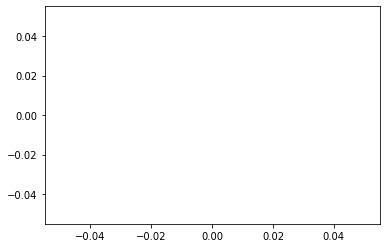

In [12]:
#Example
visualize(toy_data, point_label, cluster)

##All together with real example

In [13]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

In [14]:
class CustomDBSCAN():
    def __init__(self):
        self.core = -1
        self.border = -2

    # Find all neighbour points at epsilon distance
    def neighbour_points(self, data, pointId, epsilon):
        points = []
        for i in range(len(data)):
            # Euclidian distance
            if np.linalg.norm([a_i - b_i for a_i, b_i in zip(data[i], data[pointId])]) <= epsilon:
                points.append(i)
        return points

    # Fit the data into the DBSCAN model
    def fit(self, data, Eps, MinPt):
        # initialize all points as outliers
        point_label = [0] * len(data)
        point_count = []

        # initilize list for core/border points
        core = []
        border = []

        # Find the neighbours of each individual point
        for i in range(len(data)):
            point_count.append(self.neighbour_points(data, i, Eps))

        # Find all the core points, border points and outliers
        for i in range(len(point_count)):
            if (len(point_count[i]) >= MinPt):
                point_label[i] = self.core
                core.append(i)
            else:
                border.append(i)

        for i in border:
            for j in point_count[i]:
                if j in core:
                    point_label[i] = self.border
                    break

        # Assign points to a cluster

        cluster = 1

        # Here we use a queue to find all the neighbourhood points of a core point and find the indirectly reachable points
        # We are essentially performing Breadth First search of all points which are within Epsilon distance for each other
        for i in range(len(point_label)):
            q = queue.Queue()
            if (point_label[i] == self.core):
                point_label[i] = cluster
                for x in point_count[i]:
                    if(point_label[x] == self.core):
                        q.put(x)
                        point_label[x] = cluster
                    elif(point_label[x] == self.border):
                        point_label[x] = cluster
                while not q.empty():
                    neighbors = point_count[q.get()]
                    for y in neighbors:
                        if (point_label[y] == self.core):
                            point_label[y] = cluster
                            q.put(y)
                        if (point_label[y] == self.border):
                            point_label[y] = cluster
                cluster += 1  # Move on to the next cluster

        return point_label, cluster

    # Visualize the clusters
    def visualize(self, data, cluster, numberOfClusters):
        N = len(data)

        colors = np.array(list(islice(cycle(['#FE4A49', '#2AB7CA']), 3)))

        for i in range(numberOfClusters):
            if (i == 0):
                # Plot all outliers point as black
                color = '#000000'
            else:
                color = colors[i % len(colors)]

            x, y = [], []
            for j in range(N):
                if cluster[j] == i:
                    x.append(data[j, 0])
                    y.append(data[j, 1])
            plt.scatter(x, y, c=color, alpha=1, marker='.')
        plt.show()

###Real example

In [15]:
from sklearn.datasets import make_circles

[1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 2, 2, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 2, 2, 0, 2, 1, 2, 1, 2, 2, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 2, 2, 1, 2, 2, 1, 2, 1, 2, 2, 1, 1, 1, 0, 2, 1, 1, 1, 1, 0, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 1, 1, 2, 2, 2, 1, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 2, 1, 0, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 1, 2, 1, 1, 2, 2, 1, 2, 

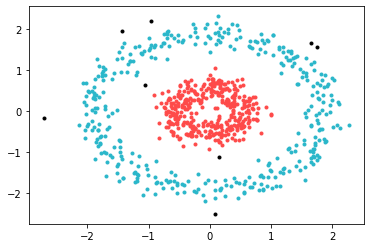

In [16]:
# Data
X, y = make_circles(n_samples=750, factor=0.3, noise=0.1)

# normalize dataset
X = StandardScaler().fit_transform(X)

custom_DBSCAN = CustomDBSCAN()
point_labels, clusters = custom_DBSCAN.fit(X, 0.25, 4)

print(point_labels, clusters)

custom_DBSCAN.visualize(X, point_labels, clusters)


#From Sklearn

In [17]:
from sklearn.cluster import DBSCAN

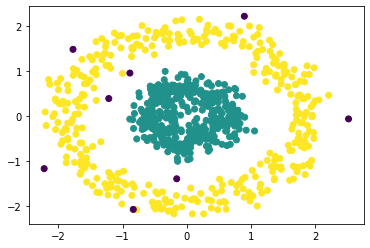

In [18]:
# Data
X, y = make_circles(n_samples=750, factor=0.3, noise=0.1)

X = StandardScaler().fit_transform(X)

y_pred = DBSCAN(eps=0.3, min_samples=10).fit_predict(X)

plt.scatter(X[:,0], X[:,1], c=y_pred)